In [168]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-24 07:38:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.47MB/s    in 47s     

2020-10-24 07:38:53 (6.56 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [169]:
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir ='/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['rock', 'scissors', 'paper', 'README_rpc-cv-images.txt']

In [170]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.4,
    fill_mode='nearest',
    validation_split=0.4
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(120,180),
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(120,180),
    subset='validation',
    
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [172]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(120, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)

Epoch 1/15
25/25 - 28s - loss: 1.1928 - accuracy: 0.4221 - val_loss: 1.0305 - val_accuracy: 0.4023
Epoch 2/15
25/25 - 29s - loss: 0.7920 - accuracy: 0.6062 - val_loss: 0.5933 - val_accuracy: 0.8242
Epoch 3/15
25/25 - 28s - loss: 0.4603 - accuracy: 0.8403 - val_loss: 0.4276 - val_accuracy: 0.8281
Epoch 4/15
25/25 - 28s - loss: 0.3564 - accuracy: 0.8623 - val_loss: 0.2525 - val_accuracy: 0.9180
Epoch 5/15
25/25 - 29s - loss: 0.2491 - accuracy: 0.9187 - val_loss: 0.2267 - val_accuracy: 0.9102
Epoch 6/15
25/25 - 29s - loss: 0.2134 - accuracy: 0.9287 - val_loss: 0.2277 - val_accuracy: 0.9336
Epoch 7/15
25/25 - 28s - loss: 0.1832 - accuracy: 0.9351 - val_loss: 0.2108 - val_accuracy: 0.9375
Epoch 8/15
25/25 - 29s - loss: 0.1668 - accuracy: 0.9425 - val_loss: 0.1475 - val_accuracy: 0.9453
Epoch 9/15
25/25 - 29s - loss: 0.1610 - accuracy: 0.9403 - val_loss: 0.2223 - val_accuracy: 0.9297
Epoch 10/15
25/25 - 30s - loss: 0.1393 - accuracy: 0.9463 - val_loss: 0.2048 - val_accuracy: 0.9492
Epoch 11/

Saving 01dM3ewPIsnBICu1.png to 01dM3ewPIsnBICu1 (2).png
01dM3ewPIsnBICu1.png
rock


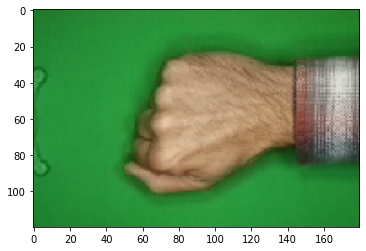

In [173]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(120,180))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')